## Working On Cody's Code

In [24]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
NS14 = pd.read_csv('data/NSDUH-2014-DS0001-data-excel.tsv', sep='\t', index_col=0)

In [3]:
NS14.shape

(55271, 3147)

In [4]:
NS14.columns[0:5]

Index([u'QUESTID2', u'CIGEVER', u'CIGOFRSM', u'CIGWILYR', u'CIGTRY'], dtype='object')

In [5]:
NS14.index[0:5]

Int64Index([1, 2, 3, 4, 5], dtype='int64', name=u'CASEID')

In [6]:
selected_columns = ['IRCIGRC','IRCGRRC','IRALCRC','IRMJRC','IRCOCRC','IRCRKRC',
                   'IRHERRC','IRHALRC','IRINHRC','IRANLRC','IROXYRC','IRTRNRC',
                   'IRSTMRC','IRSEDRC']
#For these vars, 9 is never used, 4 is more than 3 years ago, 3 is 12 months ago+, 
#2 is 30days-12months ago, 1 is past 30 days

In [7]:
DrugRecency = NS14[selected_columns]
DrugRecency.shape

(55271, 14)

There is another way to do this.  It is faster and avoids bringing the entire dataset into memory...

In [8]:
%timeit NS14 = pd.read_csv('data/NSDUH-2014-DS0001-data-excel.tsv', sep='\t', index_col=0)

1 loop, best of 3: 19.5 s per loop


In [9]:
%timeit DrugRecency = pd.read_csv('data/NSDUH-2014-DS0001-data-excel.tsv', usecols=selected_columns, sep='\t', index_col=0)

1 loop, best of 3: 3.17 s per loop


In [10]:
DrugRecency = pd.read_csv('data/NSDUH-2014-DS0001-data-excel.tsv', usecols=selected_columns, sep='\t', index_col=0)

In [11]:
DrugRecency.shape

(55271, 13)

Looks like we lost one of the columns.  Probably the index column...

In [12]:
DrugRecency.index

Int64Index([4, 1, 9, 9, 9, 9, 9, 9, 9, 9,
            ...
            4, 4, 9, 9, 9, 2, 1, 4, 1, 4],
           dtype='int64', name=u'IRCIGRC', length=55271)

Try it again, including the actual index column this time...

In [34]:
selected_columns = ['IRCIGRC','IRCGRRC','IRALCRC','IRMJRC','IRCOCRC','IRCRKRC',
                   'IRHERRC','IRHALRC','IRINHRC','IRANLRC','IROXYRC','IRTRNRC',
                   'IRSTMRC','IRSEDRC']
DrugRecency = pd.read_csv('data/NSDUH-2014-DS0001-data-excel.tsv', usecols=(['CASEID'] + selected_columns), sep='\t', index_col=0)
DrugRecency.shape

(55271, 14)

In [35]:
DrugRecency.index[:5]

Int64Index([1, 2, 3, 4, 5], dtype='int64', name=u'CASEID')

In [36]:
DrugRecency.columns[:5]

Index([u'IRCIGRC', u'IRCGRRC', u'IRALCRC', u'IRMJRC', u'IRCOCRC'], dtype='object')

In [37]:
sample = DrugRecency.head().copy() # Take a copy as we will be changing some of the values!

In [38]:
sample.loc[1,:]

IRCIGRC    4
IRCGRRC    9
IRALCRC    3
IRMJRC     9
IRCOCRC    9
IRCRKRC    9
IRHERRC    9
IRHALRC    9
IRINHRC    9
IRANLRC    9
IROXYRC    9
IRTRNRC    9
IRSTMRC    9
IRSEDRC    9
Name: 1, dtype: int64

In [39]:
# Here's a better way to iterate over a DataFrame.  iterrows is a Python generator.
for index, row in sample.iterrows():
    print index, row['IRCIGRC']

1 4
2 1
3 9
4 9
5 9


In [40]:
# Replace the 9's with NaN
sample.replace(9, np.nan, inplace=True)

In [41]:
sample

,IRCIGRC,IRCGRRC,IRALCRC,IRMJRC,IRCOCRC,IRCRKRC,IRHERRC,IRHALRC,IRINHRC,IRANLRC,IROXYRC,IRTRNRC,IRSTMRC,IRSEDRC
CASEID,,,,,,,,,,,,,,
1,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Since it works, we can now apply it to the full data set
DrugRecency.replace(9, np.nan, inplace=True)

In [43]:
DrugRecency.describe()

,IRCIGRC,IRCGRRC,IRALCRC,IRMJRC,IRCOCRC,IRCRKRC,IRHERRC,IRHALRC,IRINHRC,IRANLRC,IROXYRC,IRTRNRC,IRSTMRC,IRSEDRC
count,29212.000000,16946.000000,40694.000000,23474.000000,6636.000000,1663.000000,942.000000,7649.000000,4427.000000,7975.000000,1794.000000,5002.000000,3955.000000,1075.000000
mean,2.519204,2.922224,1.509805,2.334753,2.774563,2.863500,2.632696,2.777487,2.837362,2.529655,2.742475,2.645142,2.662705,2.769302
std,1.366022,1.146807,0.748783,0.855353,0.532974,0.446954,0.679839,0.516121,0.464000,0.716597,0.544210,0.639800,0.641281,0.541385
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11febd610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1224035d0>]], dtype=object)

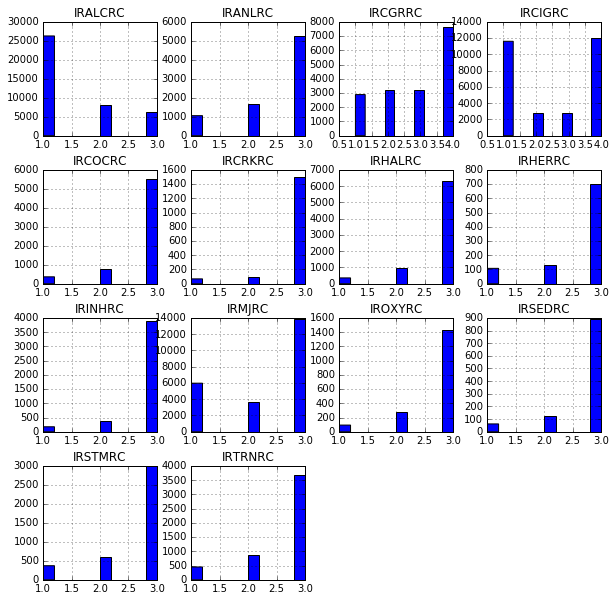

In [59]:
DrugRecency.hist(figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1250e42d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125034d10>]], dtype=object)

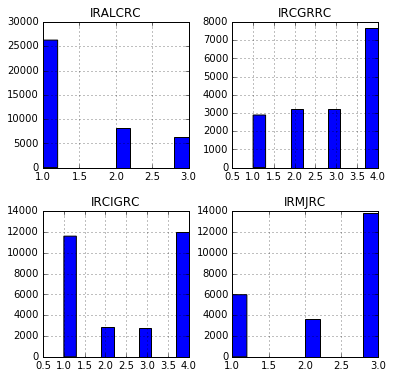

In [67]:
DrugRecency.hist(column=['IRCIGRC', 'IRCGRRC', 'IRALCRC', 'IRMJRC'], figsize=(6, 6))

In [47]:
DrugRecency[0:5]

,IRCIGRC,IRCGRRC,IRALCRC,IRMJRC,IRCOCRC,IRCRKRC,IRHERRC,IRHALRC,IRINHRC,IRANLRC,IROXYRC,IRTRNRC,IRSTMRC,IRSEDRC
CASEID,,,,,,,,,,,,,,
1,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
DrugRecency.head()

,IRCIGRC,IRCGRRC,IRALCRC,IRMJRC,IRCOCRC,IRCRKRC,IRHERRC,IRHALRC,IRINHRC,IRANLRC,IROXYRC,IRTRNRC,IRSTMRC,IRSEDRC
CASEID,,,,,,,,,,,,,,
1,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
head = DrugRecency.head()

In [56]:
head.loc[1,'IRCIGRC'] = 99.0

/Users/billtubbs/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
head

,IRCIGRC,IRCGRRC,IRALCRC,IRMJRC,IRCOCRC,IRCRKRC,IRHERRC,IRHALRC,IRINHRC,IRANLRC,IROXYRC,IRTRNRC,IRSTMRC,IRSEDRC,"(1, 1)",1
CASEID,,,,,,,,,,,,,,,,
1,99.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,99.0
2,99.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,99.0,NaN
4,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN


In [58]:
DrugRecency.head()

,IRCIGRC,IRCGRRC,IRALCRC,IRMJRC,IRCOCRC,IRCRKRC,IRHERRC,IRHALRC,IRINHRC,IRANLRC,IROXYRC,IRTRNRC,IRSTMRC,IRSEDRC
CASEID,,,,,,,,,,,,,,
1,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Ah. Actually it did make a copy and it did set the values.